In [1]:
import pandas as pd
import numpy as np

# Load Brent oil price data
data_path = r"C:\Users\bezis\Downloads\brent-oil-change-point\data\raw\BrentOilPrices.csv"
df = pd.read_csv(data_path)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Compute log returns
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))
df.dropna(inplace=True)

df.head()


C:\Users\bezis\AppData\Local\Temp\ipykernel_22108\2204282191.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Price,Log_Return
1,1987-05-21,18.45,-0.009709
2,1987-05-22,18.55,0.005405
3,1987-05-25,18.60,0.002692
4,1987-05-26,18.63,0.001612
5,1987-05-27,18.60,-0.001612


Detected change points at indices: [145, 165, 815, 980, 2200, 2705, 3825, 5390, 5560, 5915, 6445, 6980, 7510, 8330, 8380, 8820, 9010]


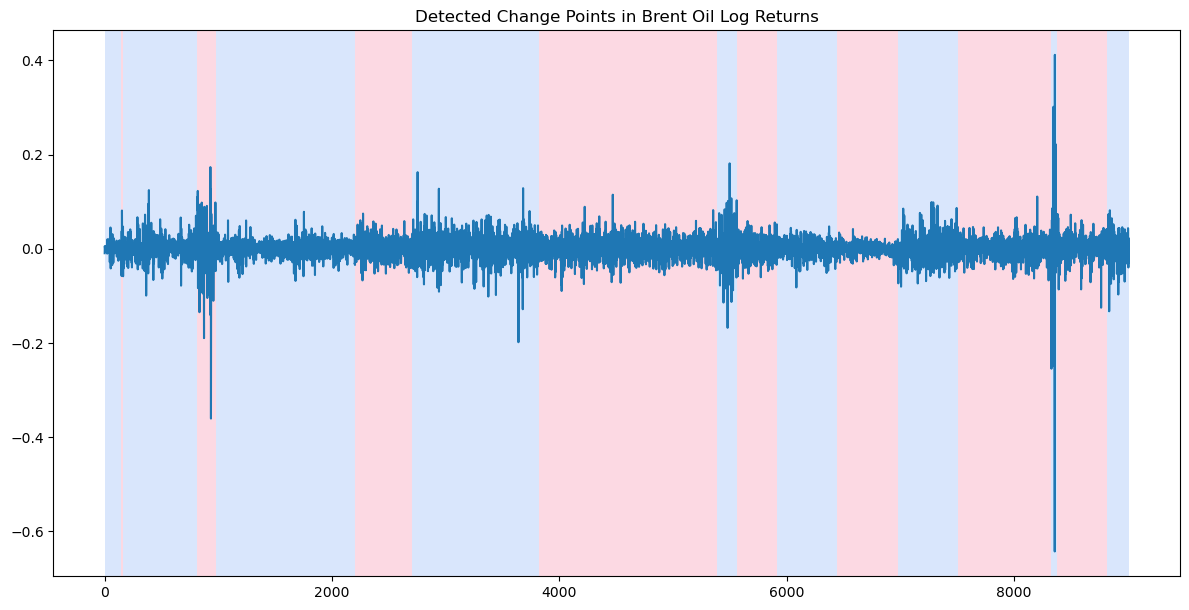

In [2]:
import ruptures as rpt
import matplotlib.pyplot as plt

# Extract log returns as numpy array
signal = df['Log_Return'].values

# Define model and change point detection algorithm
model = "rbf"  # works well for mean + variance changes
algo = rpt.Pelt(model=model).fit(signal)

# Detect change points
change_points = algo.predict(pen=3)  # penalty controls sensitivity

print("Detected change points at indices:", change_points)

# Plot results
rpt.display(signal, change_points, figsize=(12, 6))
plt.title("Detected Change Points in Brent Oil Log Returns")
plt.show()


In [4]:
change_points = algo.predict(pen=3)
if change_points[-1] == len(df):
    change_points = change_points[:-1]  # remove last index
df.iloc[change_points]



,Date,Price,Log_Return
146,1987-12-11,17.73,0.010204
166,1988-01-13,16.38,0.026602
816,1990-07-31,19.23,0.013086
981,1991-03-21,18.80,-0.009529
2201,1996-01-09,19.05,-0.032536
2706,1998-01-14,14.81,-0.018067
3826,2002-06-18,24.64,-0.002027
5391,2008-07-30,122.46,-0.026670
5561,2009-04-02,50.89,0.102766
5916,2010-08-30,76.05,0.011772
